In [1]:
#import dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
#import csv files
filepath = os.path.join(".", "raw_data", "city_data.csv")
city_data_df = pd.read_csv(filepath)
city_data_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [3]:
filepath = os.path.join(".", "raw_data", "ride_data.csv")
ride_data_df = pd.read_csv(filepath)
ride_data_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [4]:
groupby_rides = ride_data_df.groupby(["city"])
average_fare = groupby_rides["fare"].mean()
average_fare = average_fare.to_frame()
average_fare = average_fare.reset_index(drop=False)
average_fare.head()

,city,fare
0,Alvarezhaven,23.928710
1,Alyssaberg,20.609615
2,Anitamouth,37.315556
3,Antoniomouth,23.625000
4,Aprilchester,21.981579


In [5]:
rides_per_city = groupby_rides["ride_id"].count()
rides_per_city = rides_per_city.to_frame()
rides_per_city =rides_per_city.reset_index(drop=False)
rides_per_city.head()

,city,ride_id
0,Alvarezhaven,31
1,Alyssaberg,26
2,Anitamouth,9
3,Antoniomouth,22
4,Aprilchester,19


In [6]:
pyber_df=pd.merge(city_data_df, average_fare, on = "city")
pyber_df.head()

,city,driver_count,type,fare
0,Kelseyland,63,Urban,21.806429
1,Nguyenbury,8,Urban,25.899615
2,East Douglas,12,Urban,26.169091
3,West Dawnfurt,34,Urban,22.330345
4,Rodriguezburgh,52,Urban,21.332609


In [7]:
pyber_df=pd.merge(pyber_df, rides_per_city, on = "city")
pyber_df.head()

,city,driver_count,type,fare,ride_id
0,Kelseyland,63,Urban,21.806429,28
1,Nguyenbury,8,Urban,25.899615,26
2,East Douglas,12,Urban,26.169091,22
3,West Dawnfurt,34,Urban,22.330345,29
4,Rodriguezburgh,52,Urban,21.332609,23


In [8]:
# Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship between
#four key variables:
#D_id_color = {'Urban’': u'lightcoral', 'Suburban': u'skyblue', 'Rural': u'gold'}
#color_map = [color for color in D_id_color.values()[:len(pyber_df['type'])]]

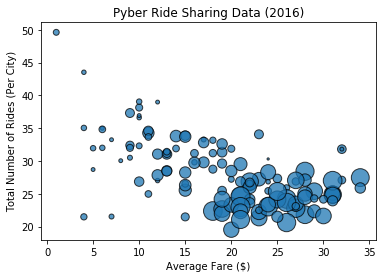

In [9]:
# * Average Fare ($) Per City
# * Total Number of Rides Per City
# * Total Number of Drivers Per City
# * City Type (Urban, Suburban, Rural)
#cmap = {"urban": "light coral", "suburban": "sky blue", "rural": "gold"}
plt.scatter(pyber_df["ride_id"], pyber_df["fare"], marker="o", edgecolors="black", s=(pyber_df["driver_count"] * 5), alpha=0.75,)
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Average Fare ($)")
plt.ylabel("Total Number of Rides (Per City)")
#plt.legend(handles=pyber_df["type"], loc="upper right")
#plt.savefig("pyberdata.png")
plt.show()

In [10]:
# In addition, you will be expected to produce the following three pie charts:

# * % of Total Fares by City Type
# * % of Total Rides by City Type
# * % of Total Drivers by City Type
groupby_type = pyber_df.groupby(["type"]).sum()
groupby_type = groupby_type.reset_index(drop=False)
groupby_type.head()

,type,driver_count,fare,ride_id
0,Rural,104,615.728572,125
1,Suburban,638,1300.433953,657
2,Urban,2607,1623.863390,1625


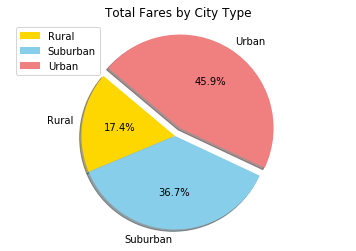

In [11]:
# In addition, you will be expected to produce the following three pie charts:

# * % of Total Fares by City Type

colors = ['gold', 'skyblue', 'lightcoral']
groupby_type.plot(kind='pie', y='fare', autopct='%1.1f%%', colors=colors, explode = (0, 0, 0.1), startangle=140, shadow=True, labels=groupby_type['type'], legend = True)
plt.axis("equal")
plt.axes().set_ylabel('')
plt.title("Total Fares by City Type")
#plt.savefig("faresbycitytype.png")
plt.show()

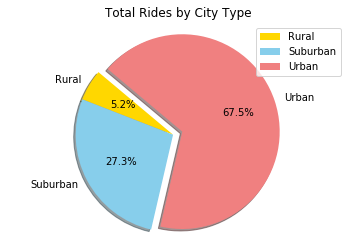

In [12]:
# * % of Total Rides by City Type
colors = ['gold', 'skyblue', 'lightcoral']
groupby_type.plot(kind='pie', y='ride_id', autopct='%1.1f%%', colors=colors, explode = (0, 0, 0.1), startangle=140, shadow=True, labels=groupby_type['type'], legend = True)
plt.axis("equal")
plt.axes().set_ylabel('')
plt.title("Total Rides by City Type")
#plt.savefig("ridesbycitytype.png")
plt.show()

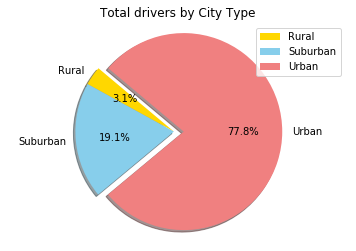

In [13]:
# * % of Total Drivers by City Type
colors = ['gold', 'skyblue', 'lightcoral']
groupby_type.plot(kind='pie', y='driver_count', autopct='%1.1f%%', colors=colors, explode = (0, 0, 0.1), startangle=140, shadow=True, labels=groupby_type['type'], legend = True)
plt.axis("equal")
plt.axes().set_ylabel('')
plt.title("Total drivers by City Type")
#plt.savefig("driversbycitytype.png")
plt.show()

In [14]:
# * You must use the Pandas Library and the Jupyter Notebook.
# * You must use Matplotlib for all plotting.
# * You must include a written description of three observable trends based on the data.
# * You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
# * Remember when making your plots to consider aesthetics!
#   * You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
#   * When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.
#   * When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.
# * You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.
# * See [Example Solution](Pyber/Pyber_Example.pdf) for a reference on expected format.